<h1><center>Inferencing from a Pretrained classification model</center></h1>
<h4>Objective:</h4>
For this demo we load a resnet_v1_101 from checkpoint, runs the classifier on the sample image and prints predictions in human-readable form. 

<h4>Steps:</h4>
First downlaod the model, class descriptions, and get a sample image URL. run below commands to downlaod model related files and move them to "model" folder <br>
wget https://storage.googleapis.com/openimages/2017_07/classes-trainable.txt <br>
wget https://storage.googleapis.com/openimages/2017_07/class-descriptions.csv <br>
wget https://storage.googleapis.com/openimages/2017_07/oidv2-resnet_v1_101.ckpt.tar.gz <br>
tar -xzf oidv2-resnet_v1_101.ckpt.tar.gz , move model files to "model" folder
<br>
wget -O cat.jpg https://farm6.staticflickr.com/5470/9372235876_d7d69f1790_b.jpg <br>


In [1]:
import os      # os related stuff
# if no GPU
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import urllib  # to get image data from given URL
import PIL, io # pyton image library 

In [2]:
curr_dir=os.path.abspath(os.curdir)
# move model and related files to this model folder
os.makedirs(curr_dir+os.sep+"model",exist_ok=True)

# top_k : number of result to show
top_k=10

In [3]:
# import tensorflow
import tensorflow as tf
model_dir=curr_dir+os.sep+'model'

# load Classification model
model_graph=tf.get_default_graph()
sess = tf.Session()
saver = tf.train.import_meta_graph(model_dir+os.sep+'oidv2-resnet_v1_101.ckpt.meta')
saver.restore(sess,model_dir+os.sep+'oidv2-resnet_v1_101.ckpt') #name of checkpoint to store from
# imput and output of the graph
input_values = model_graph.get_tensor_by_name('input_values:0')
predictions = model_graph.get_tensor_by_name('multi_predictions:0')

W0726 22:43:52.671173 4794000832 deprecation.py:323] From /Users/nishathussain-pro/miniconda3/envs/py3/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [4]:
# function to load files containing labels and human readable names for that label
def LoadLabelMap(labelmap_path, dict_path):
  """Load index->mid and mid->display name maps.
  Args:
    labelmap_path: path to the file with the list of mids, describing
        predictions.
    dict_path: path to the dict.csv that translates from mids to display names.
  Returns:
    labelmap: an index to mid list
    label_dict: mid to display name dictionary
  """
  labelmap = [line.rstrip() for line in tf.gfile.GFile(labelmap_path)]

  label_dict = {}
  for line in tf.gfile.GFile(dict_path):
    words = [word.strip(' "\n') for word in line.split(',', 1)]
    label_dict[words[0]] = words[1]

  return labelmap, label_dict

In [12]:
# Inferencing from URL
if 1:
    #url="http://www.luontoportti.com/suomi/images/8475.jpg"
    url="https://farm6.staticflickr.com/5470/9372235876_d7d69f1790_b.jpg"
    response = urllib.request.urlopen(url)
    image_data = response.read()
# Inferencing from file
if 0:
    f=open("cat.jpg","rb")
    image_data=f.read()
    f.close()

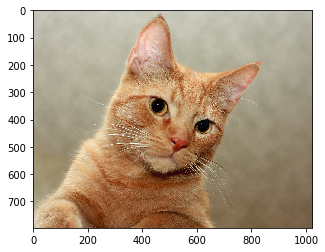

In [13]:
img=PIL.Image.open(io.BytesIO(image_data))
from matplotlib import pyplot as plt
plt.imshow(img);plt.show()

In [14]:
# Outputs probability of image for each of the 5000 classes
predictions_eval = sess.run(predictions, feed_dict={ input_values: [image_data] })
# sort predicted outputs
sorted_pred = predictions_eval.argsort()[::-1]  # indices sorted by score

In [15]:
# labels for which the model was trained 
labelmap, label_dict=LoadLabelMap(labelmap_path='model/classes-trainable.txt', dict_path='model/class-descriptions.csv')
# select top_k classes
if top_k > 0:
    sorted_pred = sorted_pred[:top_k]

In [16]:
# preprocessing to add labels names
label_score={}
for idx in sorted_pred:
    mid = labelmap[idx]
    display_name = label_dict[mid]
    score = predictions_eval[idx]

    label_score[label_dict[mid]] = predictions_eval[idx]

In [17]:
# print results
for keys in label_score:
    print(keys,':',label_score[keys])

Pet : 0.9577422
Cat : 0.95580864
Whiskers : 0.9061614
Animal : 0.89889026
Mammal : 0.8899151
Felidae : 0.7904554
Small to medium-sized cats : 0.7762765
Nose : 0.69992346
Close-up : 0.5841979
Domestic short-haired cat : 0.398375
